## Temel sınıflandırma: Giysi resimlerini sınıflandırın


> Bu kılavuz, spor ayakkabı ve gömlek gibi giysi resimlerini sınıflandırmak için bir sinir ağı modeli eğitiyor. Tüm detayları anlamazsanız sorun değil; bu, ilerledikçe açıklanan ayrıntılarla eksiksiz bir TensorFlow programının hızlı tempolu bir özetidir.

>Bu kılavuz, TensorFlow'da modeller oluşturmak ve eğitmek için üst düzey bir API olan tf.keras'ı kullanır.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Fashion MNIST veri kümesini içe aktarın

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##### Veri kümesini yüklemek dört NumPy dizisi döndürür:

* train_images ve train_labels dizileri eğitim setidir — modelin öğrenmek için kullandığı veriler.
* Model, test kümesi , test_images ve test_labels dizileri ile test edilir.

Görüntüler, piksel değerleri 0 ile 255 arasında değişen 28x28 NumPy dizileridir. Etiketler , 0 ile 9 arasında değişen bir tamsayı dizisidir. Bunlar, görüntünün temsil ettiği giysi sınıfına karşılık gelir:

<div class="devsite-table-wrapper"><table><tbody><tr><th> Etiket</th><th> Sınıf</th></tr><tr><td> 0</td><td> T-shirt / üst</td></tr><tr><td> 1</td><td> Pantolon</td></tr><tr><td> 2</td><td> Kenara çekmek</td></tr><tr><td> 3</td><td> Elbise</td></tr><tr><td> 4</td><td> Ceket</td></tr><tr><td> 5</td><td> Sandalet</td></tr><tr><td> 6</td><td> Gömlek</td></tr><tr><td> 7</td><td> Spor ayakkabı</td></tr><tr><td> 8</td><td> Sırt çantası</td></tr><tr><td> 9</td><td> Bilek boyu bot</td></tr></tbody></table></div>

Her görüntü tek bir etiketle eşleştirilir. Sınıf adları veri kümesine dahil edilmediğinden, daha sonra görüntüleri çizerken kullanmak için burada saklayın:

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Verileri keşfedin
> Modeli eğitmeden önce veri kümesinin formatını inceleyelim. Aşağıda, eğitim setinde her biri 28 x 28 piksel olarak temsil edilen 60.000 resim gösterilmektedir:

In [3]:
train_images.shape

(60000, 28, 28)

Aynı şekilde eğitim setinde 60.000 etiket var:

In [4]:
len(train_labels)

60000

Her etiket, 0 ile 9 arasında bir tam sayıdır:

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Test setinde 10.000 görüntü var. Yine, her görüntü 28 x 28 piksel olarak temsil edilir:

In [6]:
test_images.shape

(10000, 28, 28)

Ve test seti 10.000 resim etiketi içerir:

In [7]:
len(test_labels)

10000

#### Verileri önceden işleyin
Ağı eğitmeden önce veriler önceden işlenmelidir. Eğitim setindeki ilk resmi incelerseniz piksel değerlerinin 0 ile 255 aralığında olduğunu göreceksiniz:

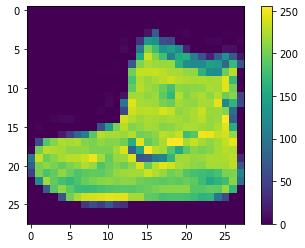

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Bu değerleri sinir ağı modeline beslemeden önce 0 ila 1 aralığında ölçeklendirin. Bunu yapmak için değerleri 255'e bölün. Eğitim seti ve test setinin aynı şekilde ön işlemden geçirilmesi önemlidir:

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Verilerin doğru biçimde olduğunu ve ağı oluşturmaya ve eğitmeye hazır olduğunuzu doğrulamak için eğitim setinden ilk 25 görüntüyü gösterelim ve her görüntünün altında sınıf adını gösterelim.

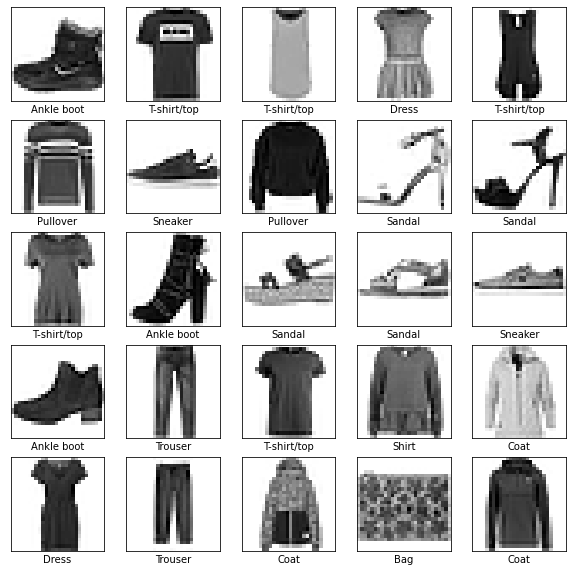

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Modeli oluşturun
Sinir ağını oluşturmak, modelin katmanlarını yapılandırmayı ve ardından modeli derlemeyi gerektirir.

## Katmanları ayarlayın
Bir sinir ağının temel yapı taşı katmandır . Katmanlar, kendilerine beslenen verilerden temsilleri çıkarır. Umarım, bu temsiller eldeki sorun için anlamlıdır.

Derin öğrenmenin çoğu, basit katmanları birbirine zincirlemekten oluşur. tf.keras.layers.Dense gibi çoğu katman, eğitim sırasında öğrenilen parametrelere sahiptir.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#tek gizli katmanlı ,gizli katmanda 128 nöron var ve çıkış 10 adet

Bu ağdaki ilk katman olan tf.keras.layers.Flatten , görüntülerin formatını iki boyutlu bir diziden (28 x 28 piksel) tek boyutlu bir diziye (28 * 28 = 784 piksel) dönüştürür. Bu katmanı, görüntüdeki üst üste dizilmiş piksel sıraları olarak düşünün ve bunları sıralayın. Bu katmanda öğrenilecek parametre yoktur; yalnızca verileri yeniden biçimlendirir.

Pikseller düzleştirildikten sonra ağ, iki tf.keras.layers.Dense katman tf.keras.layers.Dense oluşur. Bunlar yoğun şekilde bağlı veya tamamen bağlantılı sinir katmanlarıdır. İlk Dense katman 128 düğüme (veya nöron) sahiptir. İkinci (ve son) katman, 10 uzunluğunda bir logits dizisi döndürür. Her düğüm, geçerli görüntünün 10 sınıftan birine ait olduğunu gösteren bir puan içerir.

## Modeli derleyin
Model eğitime hazır olmadan önce birkaç ayara daha ihtiyaç duyar. Bunlar, modelin derleme adımı sırasında eklenir:

* Kayıp işlevi — Bu, modelin eğitim sırasında ne kadar doğru olduğunu ölçer. Modeli doğru yöne "yönlendirmek" için bu işlevi en aza indirmek istiyorsunuz.
* Optimizer — Model, gördüğü verilere ve kayıp fonksiyonuna göre nasıl güncellenir.
* Metrikler - Eğitim ve test adımlarını izlemek için kullanılır. Aşağıdaki örnek, doğru şekilde sınıflandırılan görüntülerin oranı olan doğruluğu kullanır.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Modeli eğitin
Sinir ağı modelini eğitmek aşağıdaki adımları gerektirir:

* 1- Eğitim verilerini modele aktarın. Bu örnekte, eğitim verileri train_images ve train_labels dizilerindedir.
* 2- Model, görüntüleri ve etiketleri ilişkilendirmeyi öğrenir.
* 3- Modelden, bir test seti (bu örnekte test_images dizisi) hakkında tahminlerde bulunmasını test_images .
* 4- Tahminlerin test_labels dizisindeki etiketlerle eşleştiğini doğrulayın.

## Modeli besle
Eğitime başlamak için model.fit yöntemini çağırın - buna modeli eğitim verilerine "uyması" nedeniyle denir:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.4990 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.3769 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 2s 865us/step - loss: 0.3383 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3128 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.2960 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.2817 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.2690 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 2s 946us/step - loss: 0.2594 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 2s 945us/step - loss: 0.2488 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 2s 941us/

Model eğitildikçe, kayıp ve doğruluk ölçümleri görüntülenir. Bu model, eğitim verilerinde yaklaşık 0,91 (veya% 91) doğruluğa ulaşır.

## Doğruluğu değerlendirin
Ardından, modelin test veri kümesinde nasıl performans gösterdiğini karşılaştırın:

In [17]:
import pandas as pd

In [18]:
kayipverisi = pd.DataFrame(model.history.history)

In [19]:
kayipverisi.head()

,loss,accuracy
0,0.499013,0.825250
1,0.376905,0.864667
2,0.338287,0.877750
3,0.312849,0.885450
4,0.296047,0.891017


<AxesSubplot:>

<Figure size 648x576 with 0 Axes>

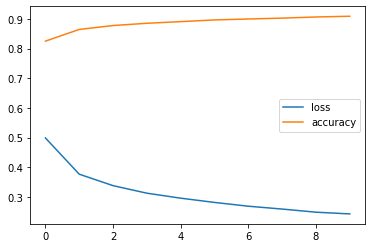

In [20]:
plt.figure(figsize=(9,8))
kayipverisi.plot()

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3510 - accuracy: 0.8738

Test accuracy: 0.8737999796867371


Test veri setindeki doğruluğun, eğitim veri setindeki doğruluktan biraz daha az olduğu ortaya çıktı. Eğitim doğruluğu ve test doğruluğu arasındaki bu boşluk, aşırı uyumu temsil eder. Aşırı uyum, bir makine öğrenimi modelinin yeni, daha önce görülmemiş girdilerde eğitim verilerinden daha kötü performans göstermesi durumunda gerçekleşir. Aşırı uyarlanmış bir model, eğitim veri setindeki gürültüyü ve ayrıntıları, modelin performansını yeni veriler üzerinde olumsuz olarak etkileyecek bir noktaya kadar "ezberler". Daha fazla bilgi için aşağıdakilere bakın:

* <a href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting">Demonstrate overfitting</a>
* <a href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting">Strategies to prevent overfitting</a>

## Tahmin yap
Eğitilen model ile bazı görüntüler hakkında tahminlerde bulunmak için kullanabilirsiniz. Modelin doğrusal çıktıları, günlükler . Logitleri, yorumlanması daha kolay olan olasılıklara dönüştürmek için bir softmax katmanı ekleyin.

In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

Burada model, test setindeki her görüntü için etiketi tahmin etmiştir. İlk tahmine bir göz atalım:

In [24]:
predictions[0]

array([1.7418914e-07, 4.4604942e-08, 6.1975811e-08, 2.3015817e-08,
       1.1800398e-07, 4.7312127e-04, 3.2237831e-06, 1.4118867e-02,
       8.4656330e-07, 9.8540348e-01], dtype=float32)

Tahmin, 10 sayılık bir dizidir. Modelin görüntünün 10 farklı giyim eşyasının her birine karşılık geldiğine olan "güvenini" temsil ediyorlar. Hangi etiketin en yüksek güven değerine sahip olduğunu görebilirsiniz:

In [25]:
np.argmax(predictions[0])

9

Bu nedenle, model bu görüntünün ayak bileği botu veya class_names[9] olduğundan en çok emindir. Test etiketinin incelenmesi, bu sınıflandırmanın doğru olduğunu gösterir:

In [26]:
test_labels[0]

9

10 sınıf tahmininin tamamına bakmak için bunun grafiğini çizin.

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Tahminleri doğrulayın
Eğitilen model ile bazı görüntüler hakkında tahminlerde bulunmak için kullanabilirsiniz.

0. görüntüye, tahminlere ve tahmin dizisine bakalım. Doğru tahmin etiketleri mavidir ve yanlış tahmin etiketleri kırmızıdır. Sayı, tahmin edilen etiket için yüzdeyi (100 üzerinden) verir.

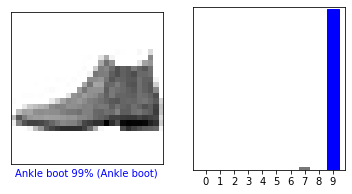

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

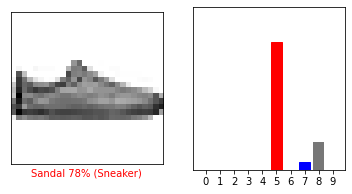

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Tahminleriyle birkaç görüntüyü çizelim. Kendinden çok emin olsa bile modelin yanlış olabileceğini unutmayın.

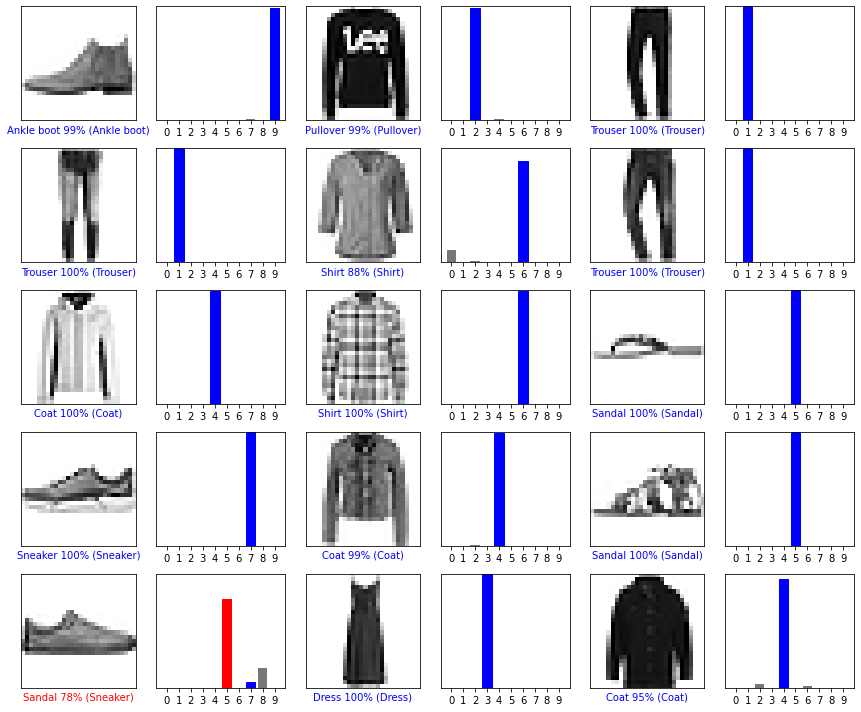

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Eğitimli modeli kullanın
Son olarak, tek bir görüntü hakkında bir tahmin yapmak için eğitimli modeli kullanın.

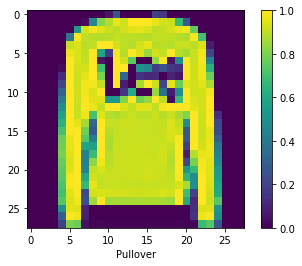

[2]
(28, 28)


In [42]:
# Grab an image from the test dataset.
img = test_images[1]
plt.figure()
plt.imshow(img)
plt.xlabel(class_names[test_labels[1]])
plt.colorbar()
plt.grid(False)
plt.show()
print([test_labels[1]])
print(img.shape)

tf.keras modelleri, bir seferde örneklerin toplu işi veya koleksiyonu üzerinde tahminler yapmak için optimize edilmiştir. Buna göre, tek bir resim kullanıyor olsanız bile, onu bir listeye eklemeniz gerekir:

In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Şimdi bu görüntü için doğru etiketi tahmin edin:

In [34]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.5846021e-05 2.0262030e-15 9.8888344e-01 4.1052277e-13 1.0902862e-02
  3.8791585e-14 1.9786920e-04 1.6998259e-14 3.4271444e-12 3.7845524e-14]]


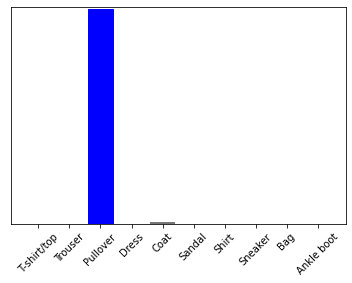

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

keras.Model.predict , veri toplu keras.Model.predict her görüntü için bir liste olmak üzere bir liste listesi döndürür. Toplu işteki (yalnızca) görselimiz için tahminleri alın:

In [36]:
np.argmax(predictions_single[0])

2

Ve model beklendiği gibi bir etiketi tahmin ediyor.

Bu kılavuz, 10 kategoride 70.000 gri tonlamalı görüntü içeren Fashion MNIST veri kümesini kullanır. Görüntüler, aşağıda görüldüğü gibi düşük çözünürlükte (28 x 28 piksel) ayrı giyim eşyalarını göstermektedir:

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">

Fashion MNIST, klasik MNIST veri kümesinin yerine geçmesi için tasarlanmıştır ve genellikle bilgisayarla görü için makine öğrenimi programlarının "Merhaba, Dünya" olarak kullanılır. MNIST veri kümesi, burada kullanacağınız giyim eşyalarına benzer bir biçimde el yazısı rakamların (0, 1, 2 vb.) Görüntülerini içerir.

Bu kılavuz, Fashion MNIST'i çeşitlilik için kullanır ve normal MNIST'ten biraz daha zor bir problem olduğu için. Her iki veri kümesi de nispeten küçüktür ve bir algoritmanın beklendiği gibi çalıştığını doğrulamak için kullanılır. Kodu test etmek ve hata ayıklamak için iyi başlangıç ​​noktalarıdır.

Burada, ağı eğitmek için 60.000 görüntü ve ağın görüntüleri sınıflandırmayı ne kadar doğru öğrendiğini değerlendirmek için 10.000 görüntü kullanılıyor. Fashion MNIST'e doğrudan TensorFlow'dan erişebilirsiniz. Fashion MNIST verilerini doğrudan TensorFlow'dan içe aktarın ve yükleyin: